In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set()

In [3]:
theta = 0.25 # true unknown parameter, P(HEAD)
a = 20 # parameter a of the prior
b = 10 # parameter b of the prior
n = 2000 # number of coin tosses. Try 5000!

In [4]:
dtheta = 1e-3 # discretization step for theta
theta_vec = np.arange(0, 1, dtheta) # discretized theta range

Define the prior function:
$$ p_{\rm prior}(\theta) = \frac{1}{B(a,b)} \theta^{a-1} (1-\theta)^{b-1},$$

Where $B(a,b)$ is a proper normalization constant corresponding to the Beta function.

In [5]:
prior_fun = lambda theta: stats.beta.pdf(theta, a, b) # beta function available in scipy.stats

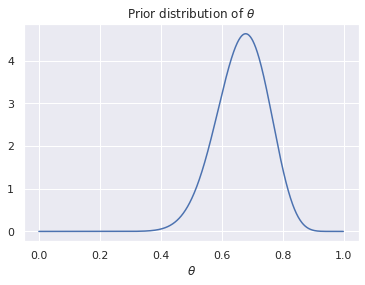

In [6]:
plt.plot(theta_vec, prior_fun(theta_vec))
plt.xlabel(r"$\theta$");
plt.title(r"Prior distribution of $\theta$");

In [7]:
y = np.random.binomial(n, theta)

In [8]:
# Approach 1: compute the posterior in closed-form (if you know an exact formula...)

exact_post_fun = lambda theta: stats.beta.pdf(theta_vec, a+y, b+n-y)

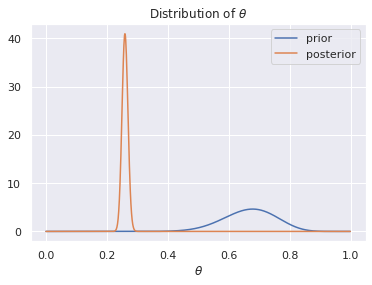

In [9]:
plt.plot(theta_vec, prior_fun(theta_vec), label="prior")
plt.plot(theta_vec, exact_post_fun(theta_vec), label="posterior")
plt.legend()
plt.xlabel(r"$\theta$");
plt.title(r"Distribution of $\theta$");

In [10]:
# Approach 2: normalize the product likelihood * prior

By definition, the posterior distribution $p_{\rm post}(\theta)$ is:
$$p_{\rm post}(\theta) = p(\theta | y) = \frac{\overbrace{p(y|\theta)}^{=\mathcal{L}(\theta)} \cdot p_{\rm prior}(\theta)}{p(y)}$$

The likelihood function $\mathcal{L}(\theta)$ is:

$$\mathcal{L}(\theta) = p(y|\theta) = {{N}\choose{k}} \theta^{y} \cdot (1-\theta)^{n-y},$$
seen as a function of $\theta$. 

Thus, we have:
$$p_{\rm post}(\theta) = Z \cdot \mathcal{L}(\theta) p_{\rm prior}(\theta),$$

where the normalization constant $Z$ must be chosen to satisfy:

$$\int_\theta p_{\rm post}(\theta) \; d\theta = 1,$$
thus

$$Z = \int_\theta \mathcal{L}(\theta) p_{\rm prior}(\theta) \; d\theta = 1.$$

Any numerical integration method can be used to approximate the integral above. Easiest choice: Riemann sum on a uniform grid, with step size $\Delta theta$
$$ Z \approx \Delta \theta \sum_{i} \mathcal{L}(\theta_i) p_{\rm prior}(\theta_i)$$

In [11]:
lik_y = (theta_vec ** y) * (1 - theta_vec)**(n-y) # likelihood (up to a multiplicative factor)

Note: the binomial coefficient ${{N}\choose{k}}$ does not depend on $\theta$ and thus it is ignored in our definition of $\mathcal{L}(\theta)$. It will be dealt with by the multiplicative constant $Z$.

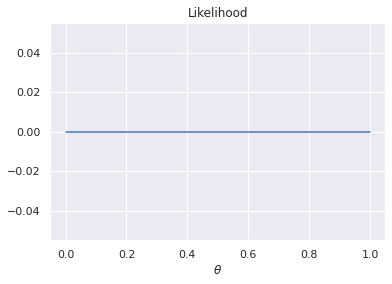

In [12]:
plt.plot(theta_vec, lik_y)
plt.xlabel(r"$\theta$");
plt.title("Likelihood");

In [13]:
p_theta_post = lik_y * prior_fun(theta_vec)
normalization_constant = (np.sum(p_theta_post) * dtheta)
p_theta_post = p_theta_post/normalization_constant

/tmp/ipykernel_17123/626668273.py:3: RuntimeWarning: invalid value encountered in true_divide
  p_theta_post = p_theta_post/normalization_constant


NOTE only in one (and perhaps 2) dimensions it is reasonable to approximate the integral numerically.

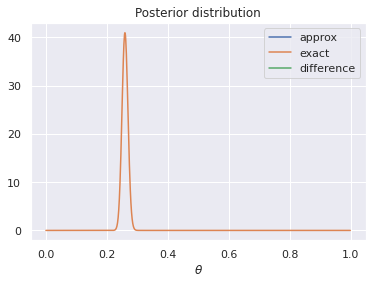

In [14]:
plt.plot(theta_vec, p_theta_post, label="approx")
plt.plot(theta_vec, exact_post_fun(theta_vec), label="exact")
plt.plot(theta_vec, p_theta_post - exact_post_fun(theta_vec), label="difference")
plt.xlabel(r"$\theta$");
plt.legend()
plt.title("Posterior distribution");

/tmp/ipykernel_17123/2327451874.py:1: RuntimeWarning: invalid value encountered in true_divide
  lik_y_scaled = lik_y/((np.sum(lik_y) * dtheta))


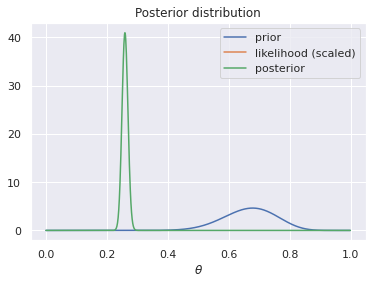

In [15]:
lik_y_scaled = lik_y/((np.sum(lik_y) * dtheta))

plt.plot(theta_vec, prior_fun(theta_vec), label="prior")
plt.plot(theta_vec, lik_y_scaled, label="likelihood (scaled)")
plt.plot(theta_vec, exact_post_fun(theta_vec), label="posterior")


plt.xlabel(r"$\theta$");
plt.legend()
plt.title("Posterior distribution");

Note: the scaled likelihood is also equivalent to the posterior for a flat prior over $[0, 1]$. A flat prior is also equivalent to a $\beta(a=1,b=1)$

What happen for large $n$ (e.g. $n = 5000$)?

We may instead compute the logarithm of the distributions. Starting from the definition:

$$p_{\rm post}(\theta) = p(\theta | y) = \frac{{p(y|\theta)} \cdot p_{\rm prior}(\theta)}{p(y)},$$

we obtain:
$$ \log p_{\rm post}(\theta) = \overbrace{\log p(y|\theta)}^{=\ell(\theta)} + \log p_{\rm prior}(\theta) + \log p(y)$$

Let us compute the log-likelihood $\ell(\theta)$:

$$\ell(\theta) = \log \mathcal{L}(\theta) = \log p(y|\theta) = \log{{N}\choose{k}} + y \log \theta + (n-y) \log (1-\theta)$$

In [16]:
log_lik_y = y*np.log(theta_vec)  + (n-y)*np.log(1 - theta_vec) # log-likelihood, up to a constant additive factor

/tmp/ipykernel_17123/2316069020.py:1: RuntimeWarning: divide by zero encountered in log
  log_lik_y = y*np.log(theta_vec)  + (n-y)*np.log(1 - theta_vec) # log-likelihood, up to a constant additive factor


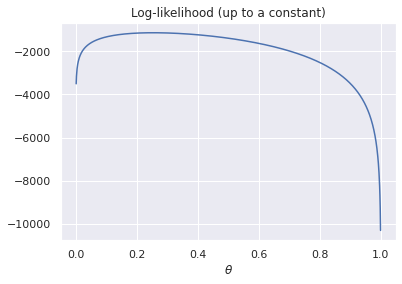

In [17]:
plt.plot(theta_vec, log_lik_y)
plt.xlabel(r"$\theta$");
plt.title("Log-likelihood (up to a constant)");

In [18]:
log_prior = np.log(prior_fun(theta_vec))

/tmp/ipykernel_17123/1761679711.py:1: RuntimeWarning: divide by zero encountered in log
  log_prior = np.log(prior_fun(theta_vec))


In [19]:
log_posterior = log_prior + log_lik_y # again, up to an additive constant

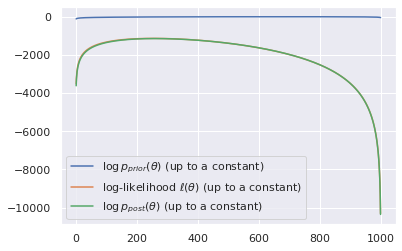

In [20]:
plt.plot(log_prior, label=r"$\log p_{prior}(\theta)$ (up to a constant)")
plt.plot(log_lik_y, label=r"log-likelihood $\ell(\theta)$ (up to a constant)")
plt.plot(log_posterior, label=r"$\log p_{post}(\theta)$ (up to a constant)")
plt.legend();

In the variable **log_posterior** we have a numerical value for $\log p_{\rm post}(\theta)$, up to an *additive* constant. Thus, in principle, **np.exp(log_posterior)** we would have the posterior, up to a *multiplicative* constant.


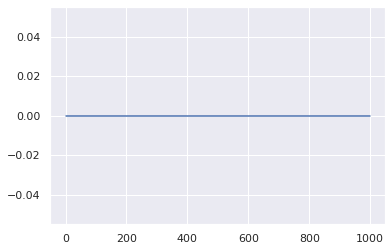

In [21]:
plt.plot(np.exp(log_posterior));

This again may fail! Problems: numbers are too small! ($e^{-2000}$). Let us choose a better additive constant for the log-likelihood:

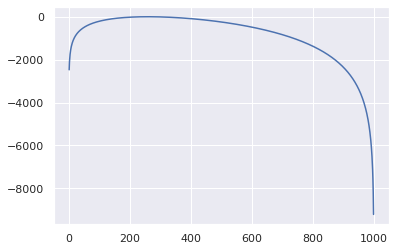

In [22]:
log_post_scaled = log_posterior - np.max(log_posterior)
plt.plot(log_post_scaled);

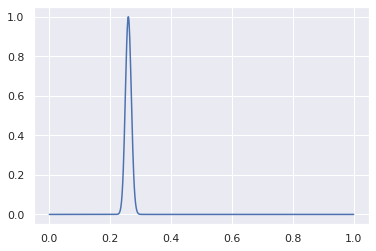

In [23]:
plt.plot(theta_vec, np.exp(log_post_scaled), label="log_posterior");

Now it works! The maximum is $e^{0} = 1$. We just need to normalize it to be a probability distribution...

In [24]:
post_unnorm = np.exp(log_post_scaled)
Z = np.sum(post_unnorm)*dtheta
post_norm = post_unnorm/Z

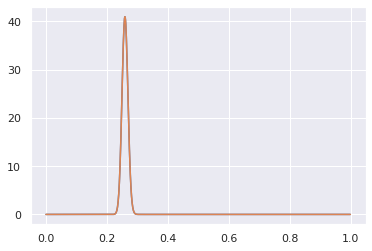

In [25]:
plt.plot(theta_vec, post_norm)
plt.plot(theta_vec, exact_post_fun(theta_vec), label="posterior");